In [2]:
from plio.io.io_gdal import GeoDataset
from shapely import wkt
import knoten.csm as csm
import json
import matplotlib.pyplot as plt
import numpy as np

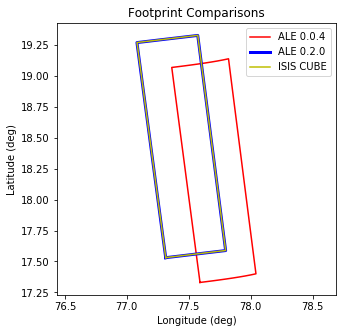

In [12]:
cub_loc = 'data/J03_045994_1986_XN_18N282W_sorted.cub'
old_isd = 'J03_045994_1986_XN_18N282W_sorted.json'
new_isd = 'data/J03_045994_1986_XN_18N282W_sorted.json'

# load ISDs into dictionaries
old_aledict = json.load(open(old_isd))
new_aledict = json.load(open(new_isd))

# make camera models from the ISDs
old_camera = csm.create_csm(old_isd)
new_camera = csm.create_csm(new_isd)

# get lines and samples from ISDs
olines, osamples = old_aledict["image_lines"], old_aledict["image_samples"]
nlines, nsamples = new_aledict["image_lines"], new_aledict["image_samples"]

# generate boundaries from ISDs
old_boundary = csm.generate_boundary((olines, osamples))
new_boundary = csm.generate_boundary((nlines, nsamples))

# generate lat lon boundaries
olons, olats, oalts = csm.generate_latlon_boundary(old_camera, old_boundary, radii=(3396.19,3376.2))
nlons, nlats, nalts = csm.generate_latlon_boundary(new_camera, new_boundary, radii=(3396.19,3376.2))

# get isis footprint
isis_wkt = str((wkt.loads(GeoDataset(cub_loc).footprint.ExportToWkt())))
isis_geom = wkt.loads(isis_wkt)
isis_lon, isis_lat = isis_geom.geoms[0].exterior.coords.xy

# Convert ISIS longitude to -180/180
isis_lon_360 = np.asarray(isis_lon)
isis_lon_180 = np.mod(isis_lon_360 - 180.0, 360.0) - 180.0

# plot footprints
plt.rcParams["figure.figsize"] = [5, 5]
plt.axes().set_aspect('equal','datalim')
plt.xlabel("Longitude (deg)")
plt.ylabel("Latitude (deg)")
plt.title("Footprint Comparisons")
oldale_plot, = plt.plot(olons, olats, 'r')
oldale_plot.set_label("ALE 0.0.4")
newale_plot, = plt.plot(nlons, nlats, 'b', linewidth=3.0)
isis_plot, = plt.plot(isis_lon_180, isis_lat, 'y', linewidth=1.5)

isis_plot.set_label('ISIS CUBE')
newale_plot.set_label("ALE 0.2.0")
plt.legend()

plt.show()